1. Buatlah model klasifikasi dengan menggunakan kNN untuk mengklasifikasikan jenis suara male dan female pada dataset voice.csv.

2. Lakukan percobaan untuk mengetahui fitur-fitur yang paling optimal untuk digunakan. Fitur apa saja yang Anda gunakan untuk mendapatkan hasil terbaik?

3. Berdasarkan fitur yang telah Anda pilih pada soal nomor 2, berapa nilai  yang terbaik? Lampirkan grafika analisis dan alasan Anda.

In [39]:
# Load data
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('voice.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [40]:
#preprocessing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.iloc[:, :-1]   # semua kolom kecuali label
y = data.iloc[:, -1]    # kolom label terakhir

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# buat model knn
from sklearn.neighbors import KNeighborsClassifier

# Tentukan nilai K (misalnya 4)
knn = KNeighborsClassifier(n_neighbors=4)

# Latih model
knn.fit(X_train, y_train)

,n_neighbors,4
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = knn.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 0.9789695057833859
Confusion Matrix:
 [[445   7]
 [ 13 486]]
Laporan Klasifikasi:
               precision    recall  f1-score   support

      female       0.97      0.98      0.98       452
        male       0.99      0.97      0.98       499

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



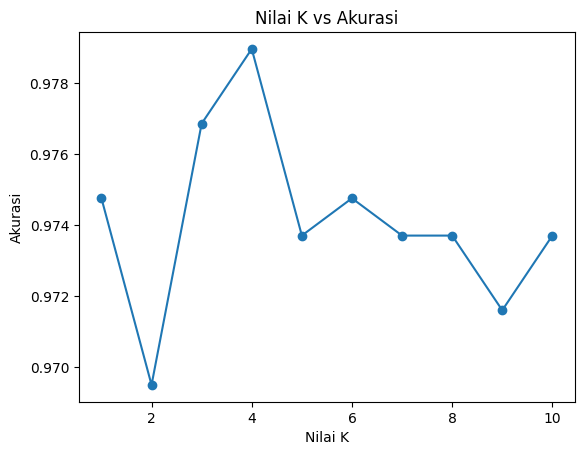

In [43]:
acc = []
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc.append(model.score(X_test, y_test))

plt.plot(range(1, 11), acc, marker='o')
plt.title('Nilai K vs Akurasi')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.show()


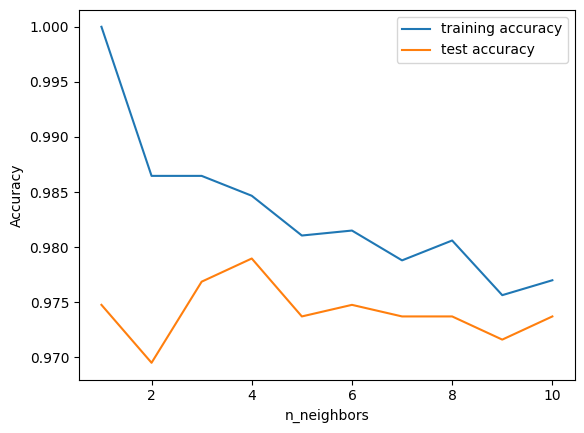

In [44]:
neighbors_settings = range(1, 11)
training_accuracy = []
test_accuracy = []

for n_neighbors in neighbors_settings:
  # build the model
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(clf.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(clf.score(X_test, y_test))


plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [45]:
# percobaan untuk mengetahui fitur-fitur yang paling optimal untuk digunakan. 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importances)


     Feature  Importance
12   meanfun    0.337880
5        IQR    0.224134
3        Q25    0.146262
1         sd    0.068544
8     sp.ent    0.039157
9        sfm    0.021984
11  centroid    0.019702
0   meanfreq    0.019223
10      mode    0.018955
6       skew    0.013945
2     median    0.013678
4        Q75    0.013193
7       kurt    0.010807
17    maxdom    0.009692
13    minfun    0.008126
15   meandom    0.008098
18   dfrange    0.007691
16    mindom    0.007531
19   modindx    0.006133
14    maxfun    0.005263


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

best_features = importances['Feature'].head(5)
X_best = data[best_features]

scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), X_best, y, cv=5)
print("Accuracy:", scores.mean())


Accuracy: 0.9621251762923537


setelah melakukan percobaan untuk mengetahui fitur-fitur yang paling optimal, hasil menunjukkan 5 fitur teratas yaitu meanfun, IQR, Q25, sd, dan sp.ent.

selanjutnya melakukan klasifikasi ulang

In [47]:
X_best.head()

,meanfun,IQR,Q25,sd,sp.ent
0,0.084279,0.075122,0.015071,0.064241,0.893369
1,0.107937,0.073252,0.019414,0.067310,0.892193
2,0.098706,0.123207,0.008701,0.083829,0.846389
3,0.088965,0.111374,0.096582,0.072111,0.963322
4,0.106398,0.127325,0.078720,0.079146,0.971955


In [48]:
# Split data (70% train, 30% test)
X_best_train, X_best_test, y_train, y_test = train_test_split(X_best, y, test_size=0.3, random_state=42)

# Standardisasi
scaler = StandardScaler()
X_best_train = scaler.fit_transform(X_best_train)
X_best_test = scaler.transform(X_best_test)

In [49]:
# Tentukan nilai K (misalnya 4)
knn = KNeighborsClassifier(n_neighbors=6)

# Latih model
knn.fit(X_best_train, y_train)

,n_neighbors,6
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


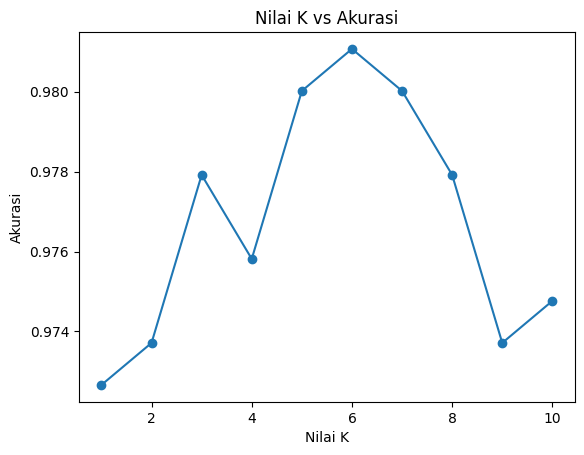

In [50]:
acc = []
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_best_train, y_train)
    acc.append(model.score(X_best_test, y_test))

plt.plot(range(1, 11), acc, marker='o')
plt.title('Nilai K vs Akurasi')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.show()


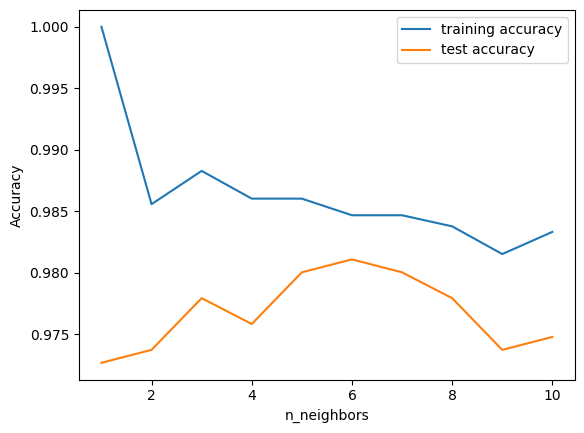

In [51]:
neighbors_settings = range(1, 11)
training_accuracy = []
test_accuracy = []

for n_neighbors in neighbors_settings:
  # build the model
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_best_train, y_train)
  # record training set accuracy
  training_accuracy.append(clf.score(X_best_train, y_train))
  # record generalization accuracy
  test_accuracy.append(clf.score(X_best_test, y_test))


plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Berdasarkan analisis grafik dan pengujian model:

1. Fitur terbaik yang digunakan adalah 5 fitur teratas berdasarkan importance dari Random Forest:
    - meanfun (0.337880)
    - IQR (0.224134) 
    - Q25 (0.146262)
    - sd (0.068544)
    - sp.ent (0.039157)

2. Nilai K terbaik adalah 6, dengan alasan:
    - Memberikan akurasi test tertinggi sebesar 0.981 atau 98.1%
    - Pada grafik analisis terlihat bahwa k=6 merupakan titik optimal dimana:
      - Training accuracy masih cukup tinggi (~0.985)
      - Test accuracy mencapai puncaknya
      - Tidak terjadi overfitting yang signifikan (gap antara training dan test accuracy relatif kecil)
      - Lebih stabil dibanding nilai k yang lebih kecil
    - Nilai k yang lebih besar dari 6 mulai menunjukkan penurunan performa

3. Model dengan 5 fitur terpilih dan k=6 menghasilkan performa yang lebih baik dibandingkan menggunakan seluruh fitur, menunjukkan bahwa pemilihan fitur berhasil mengurangi noise dan meningkatkan generalisasi model.